In [1]:
import rasterio as rio
import numpy as np
import matplotlib
from rasterio.plot import show
from PIL import Image

#### 1. Load the orthomosaic into numpy array and display it

Shape of the original orthomosaic:  (3, 5016, 3411)


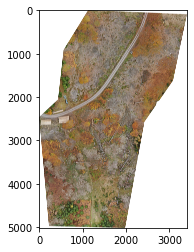

In [2]:
folder = '../Images/'

src = rio.open(folder + 'Orthomosaics/ortho-50mm.tif')
src_array = src.read()

print('Shape of the original orthomosaic: ', src_array.shape)
show(src_array)

#### 2. Crop and display a window from the orthomosaic

Shape of the test window:  (3, 512, 512)


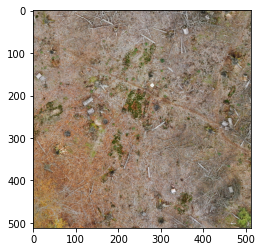

In [3]:
test = src_array[0:3, 1023:1535, 1023:1535]
print('Shape of the test window: ', test.shape)
show(test)

#### 3. Defining a function which is sliding over the orthomosaic, cropping windows from it and save the generated images

In [6]:
def sliding_window(ortho, window, stride):

    for row in range(0, ortho.shape[1]-window, stride):
        for col in range(0, ortho.shape[2]-window, stride):
            # Crop the image
            # RGB, Height, Width
            img = src_array[0:3, row:row+window, col:col+window]

            # Reshape the numpy array to be able to save as an image
            # Height, Width, RGB
            img = np.moveaxis(img, 0, -1)

            # Save the image
            # Naming convention: row_col.png
            file = Image.fromarray(img, 'RGB')
            file.save(folder + 'Sliding_window/' + str(int(row/window)) + '_' + str(int(col/window)) + '.png')

#### 4. Call the function
Parameters:
- The orthomosaic as a numpy array
- Size of the window (in pixels)
- Stride (distance between two windows in pixels)

In [7]:
sliding_window(src_array, 512, 512)